## Atividade N1 - Inteligência Artificial 2025.1

## Nome:

## RA:

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

O setor de qualidade de uma empresa fabricante de componentes eletrônicos contratou um engenheiro de computação para implantar um sistema automático de estimativa de valores de resistores. O processo de testes é baseado na Lei de Ohm, utilizando-se a equação $$V = RI,$$ em que $V$ é a tensão em (V) **aplicada** ao resistor, $I$ em (A) é a corrente elétrica **medida** e $R$ em (Ω) é o valor do resistor estimado pelo sistema que será desenvolvido pelo engenheiro de computação. A Figura 1 ilustra o processo de testes.

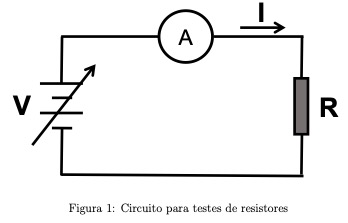

A Tabela 1 mostra as medições obtidas nos testes do resistor.

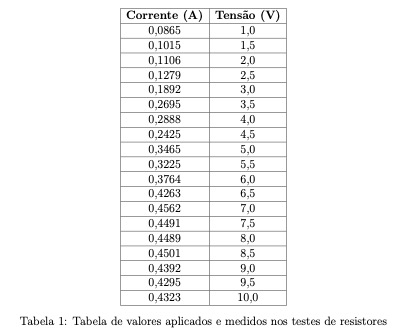

### Base de Dados:

In [5]:
#corrente
I = [0.0865,0.1015,0.1106,0.1279,0.1892,0.2695,0.2888,0.2425,0.3465,0.3225,0.3764,0.4263,0.4562,0.4491,0.4489,
     0.4501,0.4392,0.4295,0.4323]

#tensao
V = [1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0,7.5,8.0,8.5,9.0,9.5,10.0] 

In [43]:
len(I), len(V)

(19, 19)

Diante das informações fornecidas pela empresa, o engenheiro de computação deve desenvolver uma solução utilizando, obrigatoriamente, **regressão linear aplicada com machine learning**, que, a partir das informações obtidas na Tabela 1, estime o valor do resistor $R$ em (Ω). 

A solução desenvolvida deve conter:

**(5,0 pontos) o algoritmo de machine learning, que implementa e informa o valor de $R$;**

### Solução V1

_**V = R * I**_
 
_**fx = w * x + b**_

R = w

I = x

V = y

b = 0, não temos um coeficiente linear somando na fórmula original

In [ ]:
# pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
# Converter os dados para arrays numpy e redimensionar
I = np.array(I).reshape(-1, 1)
V = np.array(V).reshape(-1, 1)

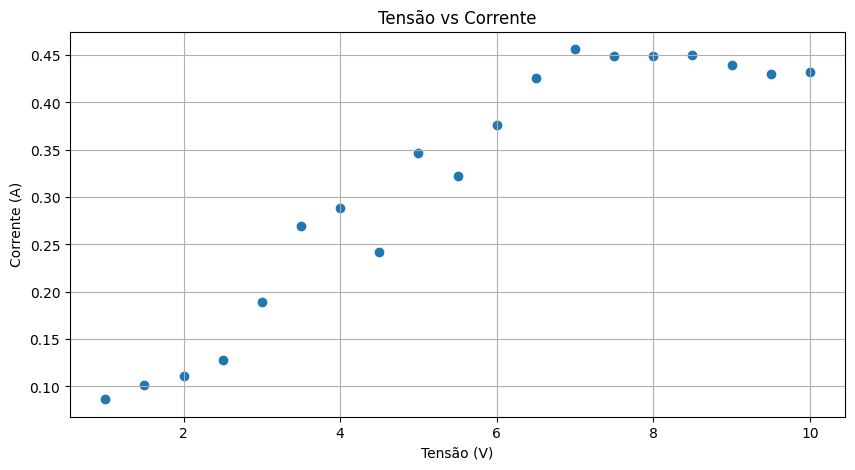

In [35]:
# Plotar distribuição dos dados
plt.figure(figsize=(10, 5))
plt.scatter(V, I)
plt.xlabel('Tensão (V)')
plt.ylabel('Corrente (A)')
plt.title('Tensão vs Corrente')
plt.grid()
plt.show()

In [28]:
# Dividir os dados em conjuntos de treino e validação
I_train, I_val, V_train, V_val = train_test_split(I, V, test_size=0.2, random_state=42)

In [29]:
# Criar o modelo de regressão linear
model = LinearRegression(fit_intercept=False)

In [30]:
# Treinar o modelo
model.fit(I_train, V_train)

LinearRegression(fit_intercept=False)

In [31]:
model.coef_, model.intercept_ # w e b
# fx = w * x + b

(array([[18.17703425]]), 0.0)

In [32]:
# Fazer previsões no conjunto de validação
V_pred = model.predict(I_val)

In [42]:
V_pred

array([[1.57231346],
       [4.89871073],
       [7.7488697 ],
       [1.84496898]])

In [ ]:
# Avaliar o modelo
mse = mean_squared_error(V_val, V_pred)
r2 = r2_score(V_val, V_pred)

print(f'Mean Squared Error: {mse}') # Erro quadrático médio, o quão bem o modelo está acertando os valores reais (quanto menor melhor)
print(f'R^2 Score: {r2}') # Coeficiente de determinação, o quão bom é o modelo comparado a um chute básico (quando maior melhor)

Mean Squared Error: 0.9906533809591275
R^2 Score: 0.7879537913666081


In [45]:
# Coeficiente angular (slope) da regressão linear é o valor do resistor R
R = model.coef_[0]
print(f'Valor estimado do resistor R: {R} Ω')

Valor estimado do resistor R: [18.17703425] Ω


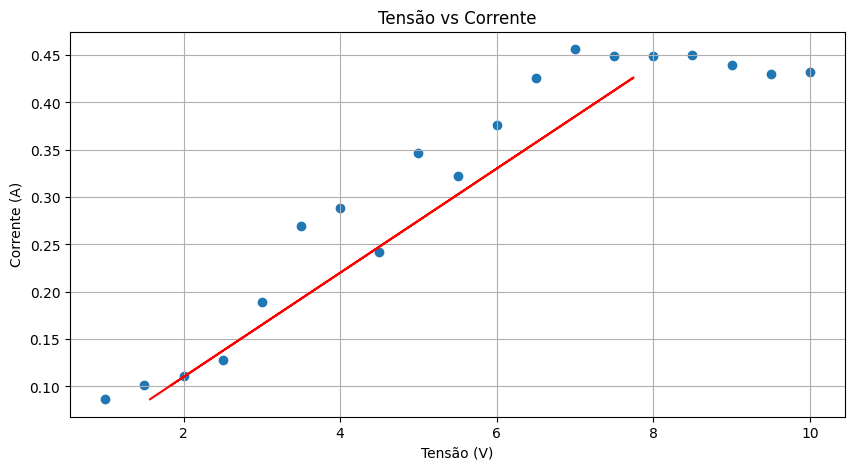

In [44]:
# Plotar a linha de regressão
plt.figure(figsize=(10, 5))
plt.scatter(V, I)
plt.plot(V_pred, I_val, color='red')
plt.xlabel('Tensão (V)')
plt.ylabel('Corrente (A)')
plt.title('Tensão vs Corrente')
plt.grid()
plt.show()

**(1,0 ponto) o valor do parâmetro de tolerância do resistor $R$, justificando sua resposta.**

In [37]:
#usar este espaco para desenvolver sua resposta

Sendo a regressão linear a solução de machine learning mais indicada para estimar o valor de $R$,

**(1,0 ponto) o coeficiente da regressão linear chamado de intercept deve ser considerado na execução do algoritmo? Justifique sua resposta;**

In [ ]:
# A fórmula que descreve a tensão aplicada ao resistor não possui um coeficiente linear (b) e é dada por V = R * I.
# Portanto, o valor do resistor R é o coeficiente angular da regressão linear e por isso não deve ser considerado na execução do modelo.

**(1,0 ponto) qual é a precisão aproximada para utilizar-se o menor número de iterações na execução da aplicação, tendo como base o custo ou erro obtido em cada iteração? Justifique sua resposta.**

In [39]:
#usar este espaco para desenvolver sua resposta

Analisando o problema e a solução desenvolvida, considerando os aspectos da engenharia e da física envolvidos, descreva e justifique

**(2,0 pontos) uma recomendação de melhoria no processo da empresa.**

In [ ]:
# A partir do gráfico de tensão vs corrente, podemos ver que os dados a partir de aproximadamente V = 7 não seguem uma relação linear, o que é esperado para um resistor ôhmico. A resistência não permanece constante.
# Uma recomendação seria testar um modelo mais complexo para essa distribuição como um modelo polinomial para capturar a não linearidade dos dados
